In [7]:
################################################ colab
# Code to read csv file into Colaboratory:
!pip install PyDrive
!pip install keras-tuner --upgrade
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/bin/bash: /home/mahan100/.conda/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached PyDrive-1.3.1.tar.gz (987 kB)
  Preparing metadata (setup.py) ... done
  Using cached google_api_python_client-2.126.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached google_api_core-2.18.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached googleapis_common_protos-1.63.0-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached proto_plus-1.23.0-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 3.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import tensorflow as tf
import keras_tuner
from keras_tuner import Hyperband
from keras_tuner import RandomSearch
plt.style.use('fivethirtyeight')

2024-04-23 16:36:46.217593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 16:36:46.405944: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 16:36:46.486636: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-23 16:36:47.057855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [3]:
################################################ colab
id='1QA-XLkzZIilzIceqkWwGGa07orKsurxI'
downloaded1 = drive.CreateFile({'id':id})
downloaded1.GetContentFile('BTC_1min.csv')
df = pd.read_csv('BTC_1min.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:

df = pd.read_csv('BTC_1min.csv')
df

In [4]:
df1=df.set_index(pd.DatetimeIndex(df['Timestamp'].values))
df1=df1.interpolate()
df1=df1.iloc[::15]
df1

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1970-01-01 00:00:01.325317920,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1970-01-01 00:00:01.325318820,1325318820,4.39,4.39,4.39,4.39,1.947561,8.549791,4.390000
1970-01-01 00:00:01.325319720,1325319720,4.39,4.39,4.39,4.39,3.439540,15.099582,4.390000
1970-01-01 00:00:01.325320620,1325320620,4.39,4.39,4.39,4.39,4.931520,21.649372,4.390000
1970-01-01 00:00:01.325321520,1325321520,4.39,4.39,4.39,4.39,6.423500,28.199163,4.390000
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:01.617145140,1617145140,58697.28,58722.57,58697.02,58711.15,0.442424,25971.603997,58702.947498
1970-01-01 00:00:01.617146040,1617146040,58681.96,58733.62,58681.96,58733.62,0.018962,1113.461559,58721.424522
1970-01-01 00:00:01.617146940,1617146940,58737.12,58748.45,58727.63,58748.45,0.705325,41433.711630,58744.180682
1970-01-01 00:00:01.617147840,1617147840,58599.78,58600.00,58599.78,58600.00,3.000086,175805.057640,58599.999957


In [ ]:
plt.figure(figsize=(16,8))
plt.title('Price History')
plt.plot(df1['Close'])
plt.xlabel('DATE')
plt.ylabel('PRICE USD')
plt.show()

In [13]:
data=df1.filter(['Close' , 'Volume_(BTC)'])
dataset=data.values
dataset

array([[4.39000000e+00, 4.55580870e-01],
       [4.39000000e+00, 1.94756055e+00],
       [4.39000000e+00, 3.43954023e+00],
       ...,
       [5.87484500e+04, 7.05324530e-01],
       [5.86000000e+04, 3.00008631e+00],
       [5.87605900e+04, 7.20415490e-01]])

In [ ]:
training_data_len=math.ceil(len(dataset)*0.80)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
training_data=scaled_data[0:training_data_len , :]

scaled_data

array([[4.67786657e-05],
       [           nan],
       [           nan],
       ...,
       [9.50502668e-01],
       [9.51097518e-01],
       [9.51382237e-01]])

In [ ]:
xtrain=[]
ytrain=[]
n=60


# In[111]:


# Data Shape:
# (samples , time steps , features)


# In[112]:


for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , :])
    ytrain.append(training_data[i,0])

xtrain , ytrain = np.array(xtrain),np.array(ytrain)
ytrain=np.reshape(ytrain , (ytrain.shape[0],1,1))


In [ ]:
model=Sequential()
# input_shape = (time steps , features )
model.add(LSTM(50,activation='relu', return_sequences=True,input_shape=(xtrain.shape[1],2)))
model.add(LSTM(50,activation='relu',return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,batch_size=32,epochs=30)

In [ ]:

def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(xtrain.shape[1],2)))

  # Tune the number of dense layers
  for i in range(hp.Int('num_layers', 1, 5)):

    # Tune the number of units in the each dense layer
    hp_units = hp.Int('units_'+str(i), min_value=32, max_value=512, step=32)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))

    # Tune the dropout rate in the each dense layer
    hp_dropout = hp.Float('rate', min_value=0.0, max_value=0.5, step=0.1)
    model.add(tf.keras.layers.Dropout(hp_dropout))

  # Add dense output layer
  model.add(tf.keras.layers.Dense(1, activation='relu'))

  # Tune the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mean_squared_error',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


In [ ]:
tuner = Hyperband(model_builder,
objective=keras_tuner.Objective("root_mean_squared_error", direction="min"),
max_epochs=30,
factor=3,
directory='keras_tuner',
project_name='bitcoin_price_prediction',
overwrite=True)

In [ ]:
# Optimize the hyperparameter search for hypermodel
tuner.search(xtrain, ytrain, epochs=10, validation_split=0.2)

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(xtrain, ytrain, epochs=50, validation_split=0.2)

Epoch 1/50
6475/6475 [==============================] - 21s 3ms/step - loss: 2.5995e-06 - root_mean_squared_error: 0.0016 - val_loss: 6.1093e-06 - val_root_mean_squared_error: 0.0025
Epoch 2/50
6475/6475 [==============================] - 16s 3ms/step - loss: 3.7256e-07 - root_mean_squared_error: 6.1037e-04 - val_loss: 8.5242e-06 - val_root_mean_squared_error: 0.0029
Epoch 3/50
6475/6475 [==============================] - 16s 2ms/step - loss: 2.5697e-07 - root_mean_squared_error: 5.0693e-04 - val_loss: 8.6113e-06 - val_root_mean_squared_error: 0.0029
Epoch 4/50
6475/6475 [==============================] - 17s 3ms/step - loss: 2.1780e-07 - root_mean_squared_error: 4.6669e-04 - val_loss: 3.9936e-06 - val_root_mean_squared_error: 0.0020
Epoch 5/50
6475/6475 [==============================] - 16s 2ms/step - loss: 1.8330e-07 - root_mean_squared_error: 4.2813e-04 - val_loss: 2.2339e-06 - val_root_mean_squared_error: 0.0015
Epoch 6/50
6475/6475 [==============================] - 16s 2ms/step 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 120)               0         
                                                                 
 dense_5 (Dense)             (None, 384)               46464     
                                                                 
 dropout_4 (Dropout)         (None, 384)               0         
                                                                 
 dense_6 (Dense)             (None, 448)               172480    
                                                                 
 dropout_5 (Dropout)         (None, 448)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 449       
                                                                 
Total params: 219,393
Trainable params: 219,393
Non-tr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Project/Lstm/model1')

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Project/Lstm/model1')

In [ ]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , 0]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , :])


# In[122]:


ytest=np.array(ytest)
xtest=np.array(xtest)
prediction=model.predict(xtest)

In [ ]:
# Evaluate the test performance of the tuned model
eval_result = model.evaluate(xtest, ytest)
print("[test loss, test accuracy]:", eval_result)

2024/2024 [==============================] - 5s 2ms/step - loss: 382216864.0000 - root_mean_squared_error: 19550.3672
[test loss, test accuracy]: [382216864.0, 19550.3671875]


In [ ]:
Predict_dataset_like = np.zeros(shape=(len(prediction), 2) )

Predict_dataset_like[:,0] = prediction[:,0]

prediction = scaler.inverse_transform(Predict_dataset_like)[:,0]

rmse =np.sqrt(np.mean(((prediction- ytest)**2)))
print(rmse)

367.65724149398886


In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


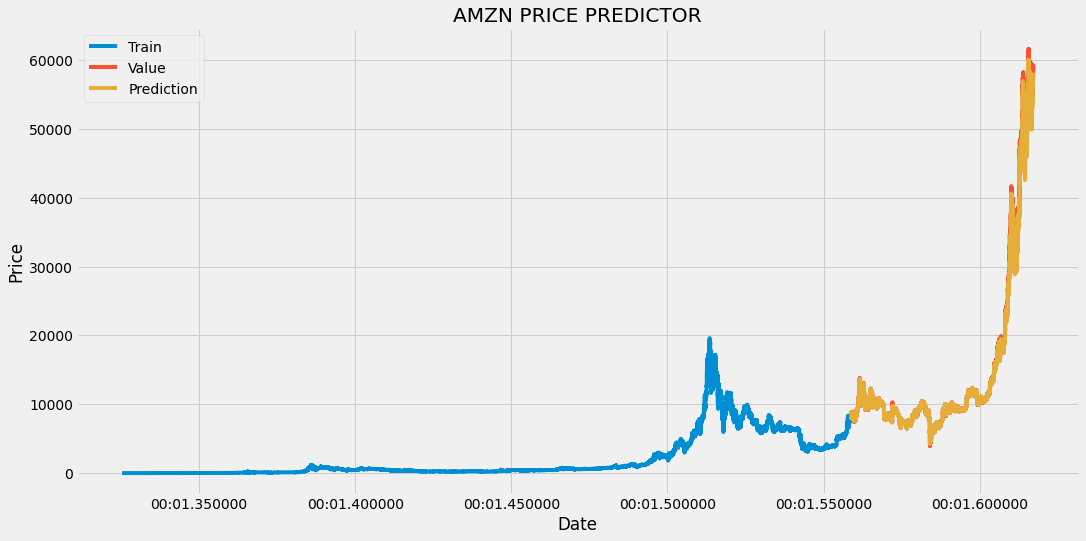

In [ ]:
plt.figure(figsize=(16,8))
plt.title('AMZN PRICE PREDICTOR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [ ]:
newdf=data[-60:].values
scaler=MinMaxScaler(feature_range=(0,1))
snewdf=scaler.fit_transform(newdf)
xtest=[]
xtest.append(snewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],2))

prediction=model.predict(xtest)
Predict_dataset_like = np.zeros(shape=(len(prediction), 2) )
Predict_dataset_like[:,0] = prediction[:,0]
prediction = scaler.inverse_transform(Predict_dataset_like)[:,0]
prediction

array([58651.38369459])

In [ ]:
pred_df = pd.DataFrame()
pred_df['Date'] = pd.date_range(start = df.Date.iloc[-1] , periods = 2 , closed = 'right')

pred_df['Close'] = prediction
pred_df =pred_df.set_index(pd.DatetimeIndex(pred_df['Date'].values))
mypred = pd.concat([data, pred_df])
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using DL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(mypred['Close'].tail())
plt.legend(['Value & Prediction'])
plt.show()